In [1]:
import numpy as np
import matplotlib.pyplot as plt
fruits=np.load("fruits_300.npy")
fruits_2D=fruits.reshape(-1, 100*100)
print(fruits.shape,fruits_2D.shape)

(300, 100, 100) (300, 10000)


In [2]:
def draw_fruits(arr,ratio=1):
    n=len(arr) #샘플개수
    #한줄에 10개씩 이미지를 그립니다. 샘플개수를 10으로 전체 행 개수를 계산합니다
    rows=int(np.ceil(n/10))
    #행이 1개면 열의 개수는 샘플 개수입니다. 그렇지 않으면 10개 입니다.
    cols= n if rows <2 else 10
    fig,axs=plt.subplots(rows,cols,figsize=(cols*ratio,rows*ratio),squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10+j<n: #n개까지만 그립니다
                axs[i,j].imshow(arr[i*10+j],cmap='gray_r')
            axs[i,j].axis("off")
plt.show()           

# 2 PCA클레스

In [3]:
from sklearn.decomposition import PCA
pca=PCA(n_components=50)
pca.fit(fruits_2D)

PCA(n_components=50)

In [4]:
print(pca.components_.shape)

(50, 10000)


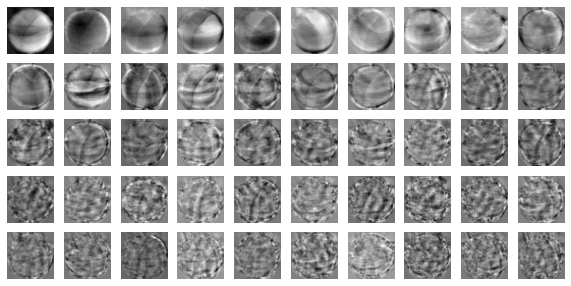

In [5]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [6]:
print(fruits_2D.shape)

(300, 10000)


In [7]:
fruit_pca=pca.transform(fruits_2D)
print(fruit_pca.shape)

(300, 50)


# 3.원본데이터재구성

In [8]:
fruits_inverse=pca.inverse_transform(fruit_pca)
print(fruits_inverse.shape)

(300, 10000)


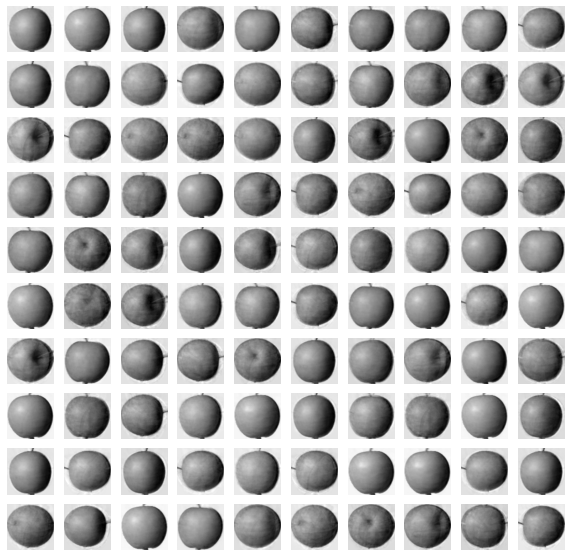

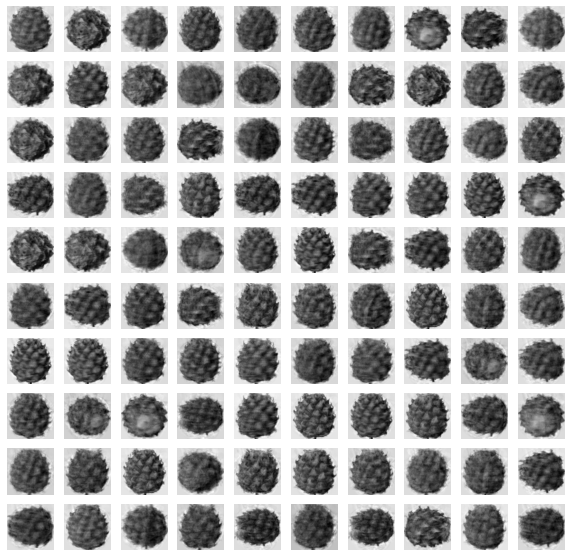

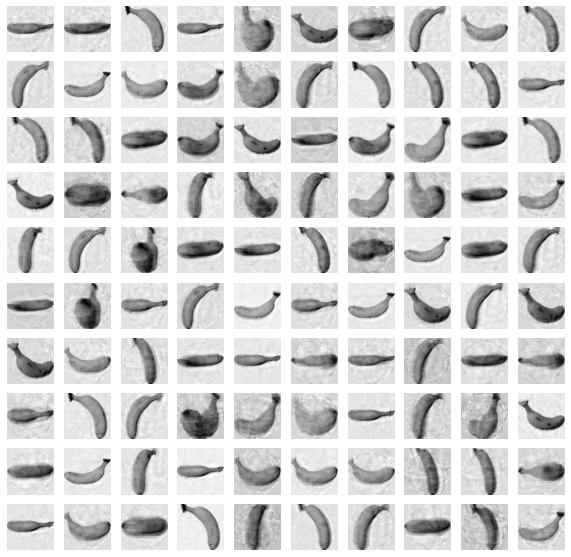

In [9]:
fruits_reconstrct=fruits_inverse.reshape(-1,100,100)
for satar in [0,100,200]:
    draw_fruits(fruits_reconstrct[satar:satar+100])
    print("\n")

# 4설명된 분산

In [10]:
print(np.sum(pca.explained_variance_ratio_))

0.9215078670495356


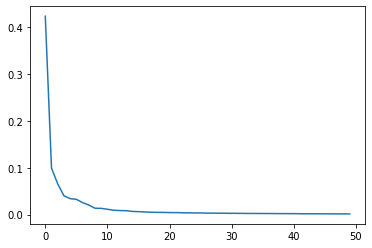

In [11]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

# 5. 다른알고리즘과 하메 사용하기

In [18]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [19]:
Y=np.array([0]*100+[1]*100+[2]*100)

In [20]:
from sklearn.model_selection import cross_validate
scores=cross_validate(lr,fruits_2D,Y)
print(np.mean(scores["test_score"]))
print(np.mean(scores["fit_time"]))

0.9966666666666667
0.6816660404205322


In [21]:
from sklearn.model_selection import cross_validate
scores=cross_validate(lr,fruit_pca,Y)
print(np.mean(scores["test_score"]))
print(np.mean(scores["fit_time"]))

1.0
0.015901708602905275


In [22]:
pca=PCA(n_components=0.5)
pca.fit(fruits_2D)

PCA(n_components=0.5)

In [23]:
print(pca.n_components_)

2


In [28]:
fruits_pca=pca.transform(fruits_2D)
print(fruit_pca.shape)

(300, 2)


In [29]:
scores= cross_validate(lr,fruits_pca,Y)
print(np.mean(scores["test_score"]))
print(np.mean(scores["fit_time"]))

0.9933333333333334
0.02261381149291992


C:\Users\KOREAIT\anaconda3\envs\pt3prer32\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\KOREAIT\anaconda3\envs\pt3prer32\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

In [30]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_,return_counts=True))

(array([0, 1, 2]), array([110,  99,  91], dtype=int64))


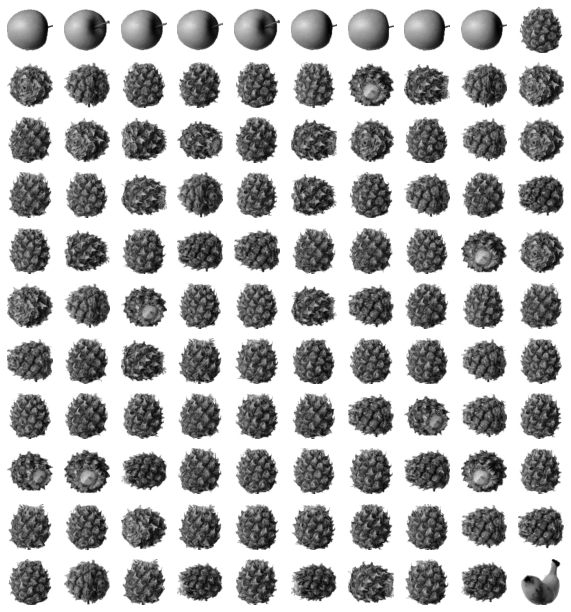

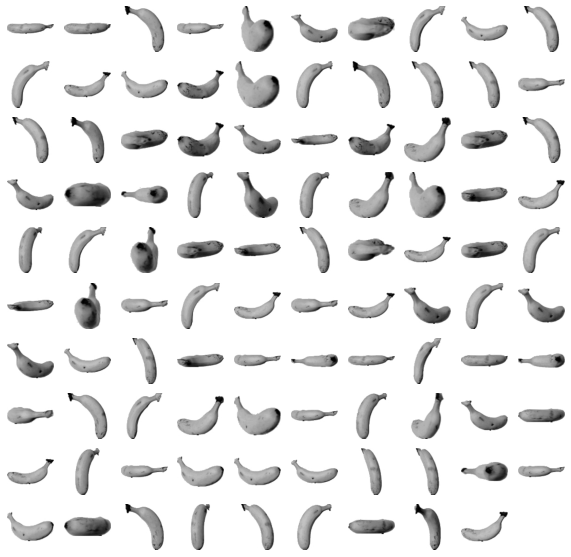

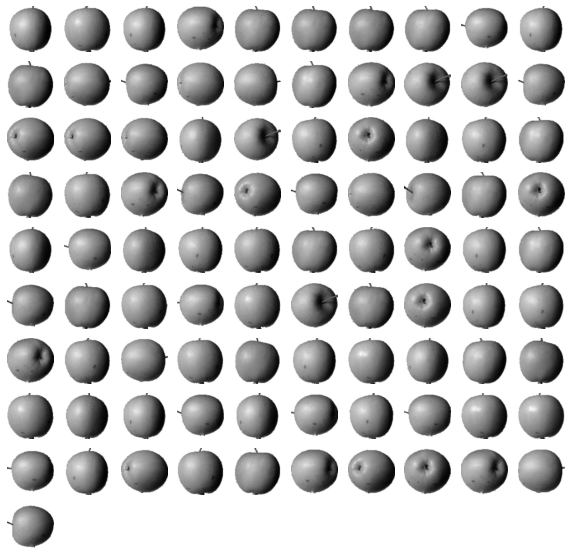

In [36]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

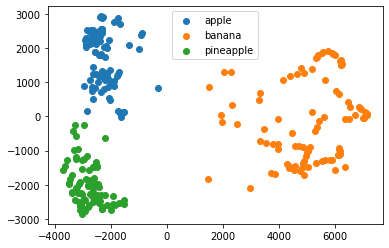

In [38]:
for label in range(0,3):
    data= fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0],data[:,1])
plt.legend(["apple","banana","pineapple"])
plt.show()